# 📊 Plots

## 📚 Loading libraries

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import seaborn as sns

from utils.const import *

## 📍 Parameters

In [2]:
# Plots Parameters
SMALL_SIZE = 25
MEDIUM_SIZE = 30
BIGGER_SIZE = 35

plt.rc('font', size=BIGGER_SIZE)         # Controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # Fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # Fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # Fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # Fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # Legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # Fontsize of the figure title

## 🔐 Authentication

### 📏 Mean Performance on All Models

In [3]:
# Loading files
auths = []

for file in sorted(os.listdir(RESULTS)):
    if len(file.split('.')) > 1 and 'AUTH' in file:
        authPath = os.path.join(RESULTS, file)
        auths.append(pd.read_csv(authPath, index_col=0))

df = pd.concat(auths)

In [4]:
# Renaming Models with abbreviations
df['Model'] = df['Model'].str.replace("AdaBoost","AB")
df['Model'] = df['Model'].str.replace("Decision Tree","DT")
df['Model'] = df['Model'].str.replace("Gaussian Naive Bayes","GNB")
df['Model'] = df['Model'].str.replace("Nearest Neighbors","KNN")
df['Model'] = df['Model'].str.replace("Neural Network","NN")
df['Model'] = df['Model'].str.replace("Quadratic Discriminant Analysis","QDA")
df['Model'] = df['Model'].str.replace("Random Forest","RF")
df['Model'] = df['Model'].str.replace("Support Vector Machine","SVM")

# Renaming IDs
df['ID'] = df['ID'].astype('str').str.replace("1","Architecture")
df['ID'] = df['ID'].str.replace("2","Battery Model")

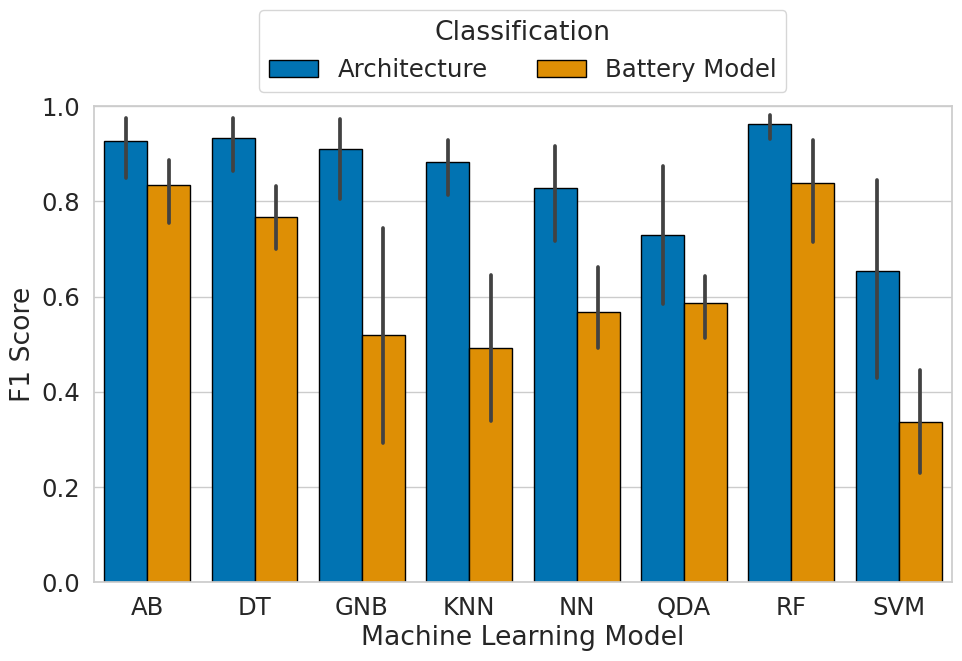

In [5]:
COLORS = ["#1F8A70", "#FC7300"]

sns.set(style="whitegrid", font_scale=1.6, palette=sns.color_palette("colorblind", desat=None))

fig, ax = plt.subplots(figsize=(10, 7))
bar_plot = sns.barplot(data=df, x='Model', y='F1', hue='ID', saturation=1, ax=ax, edgecolor="black")

# Legend
leg = plt.legend(bbox_to_anchor=(0., 1.02, 1., .102),
                 loc='lower center', ncol=3, borderaxespad=0.2)
leg._legend_box.align = "left"
leg.set_title("Classification")
leg._legend_box.align = "center"

# Axis labels
plt.ylim(0, 1)
plt.xlabel("Machine Learning Model")
plt.ylabel("F1 Score")

plt.tight_layout()
plt.savefig(FIGURES + 'AUTH_F1.pdf')

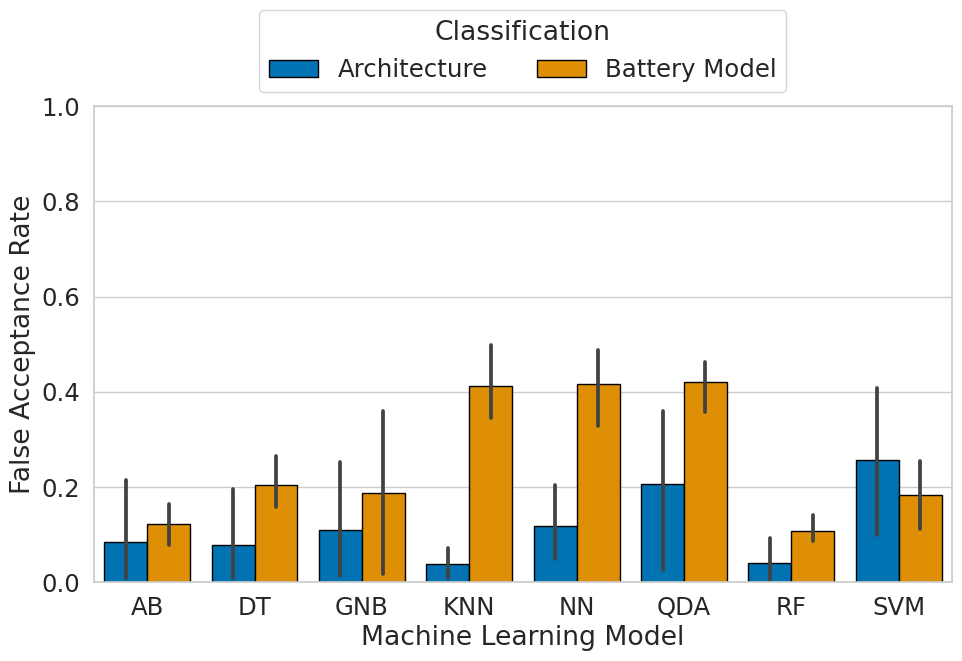

In [6]:
COLORS = ["#1F8A70", "#FC7300"]

sns.set(style="whitegrid", font_scale=1.6,
        palette=sns.color_palette("colorblind", desat=None))

fig, ax = plt.subplots(figsize=(10, 7))
bar_plot = sns.barplot(data=df, x='Model', y='FAR', hue='ID', saturation=1, ax=ax, edgecolor="black")

# Legend
leg = plt.legend(bbox_to_anchor=(0., 1.02, 1., .102),
                 loc='lower center', ncol=3, borderaxespad=0.2)
leg._legend_box.align = "left"
leg.set_title("Classification")
leg._legend_box.align = "center"

# Axis labels
plt.ylim(0, 1)
plt.xlabel("Machine Learning Model")
plt.ylabel("False Acceptance Rate")

plt.tight_layout()
plt.savefig(FIGURES + 'AUTH_FAR.pdf')

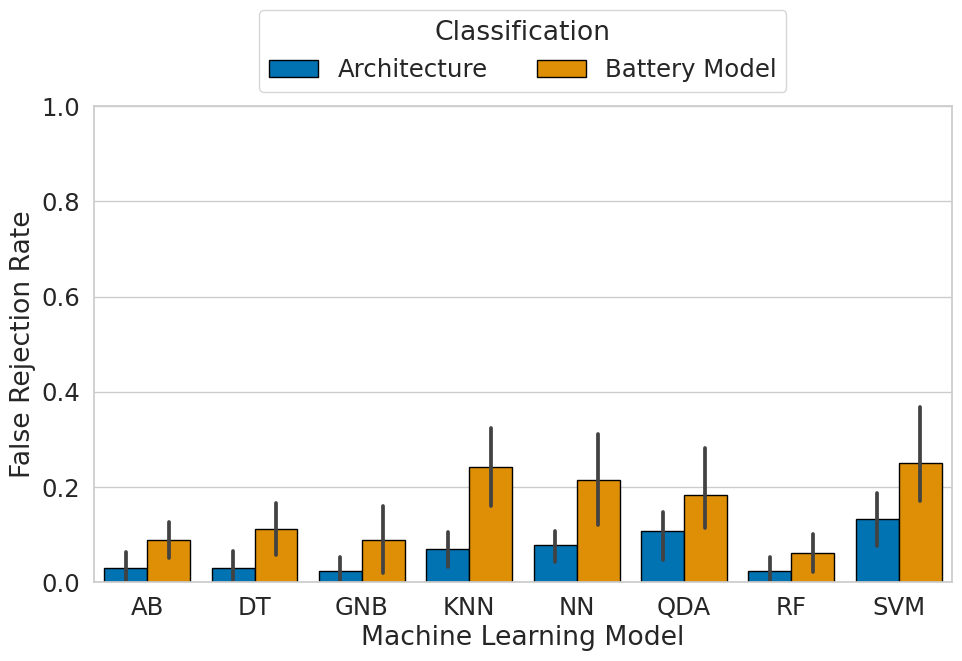

In [7]:
COLORS = ["#1F8A70", "#FC7300"]

sns.set(style="whitegrid", font_scale=1.6,
        palette=sns.color_palette("colorblind", desat=None))

fig, ax = plt.subplots(figsize=(10, 7))
bar_plot = sns.barplot(data=df, x='Model', y='FRR', hue='ID', saturation=1, ax=ax, edgecolor="black")

# Legend
leg = plt.legend(bbox_to_anchor=(0., 1.02, 1., .102),
                 loc='lower center', ncol=3, borderaxespad=0.2)
leg._legend_box.align = "left"
leg.set_title("Classification")
leg._legend_box.align = "center"

# Axis labels
plt.ylim(0, 1)
plt.xlabel("Machine Learning Model")
plt.ylabel("False Rejection Rate")

plt.tight_layout()
plt.savefig(FIGURES + 'AUTH_FRR.pdf')

### ⚖️ Dependance on Balance

In [8]:
balancedf = pd.DataFrame(np.repeat(df.values, 2, axis=0))
balancedf.columns = df.columns

far_frr = []
far_frr_score = []
for i in range(len(balancedf)):
    if i % 2 == 0:
        far_frr.append('FAR')
        far_frr_score.append(balancedf.iloc[i]['FAR'])
    else:
        far_frr.append('FRR')
        far_frr_score.append(balancedf.iloc[i]['FRR'])

balancedf['FAR/FRR'] = far_frr
balancedf['FAR/FRR_Score'] = far_frr_score


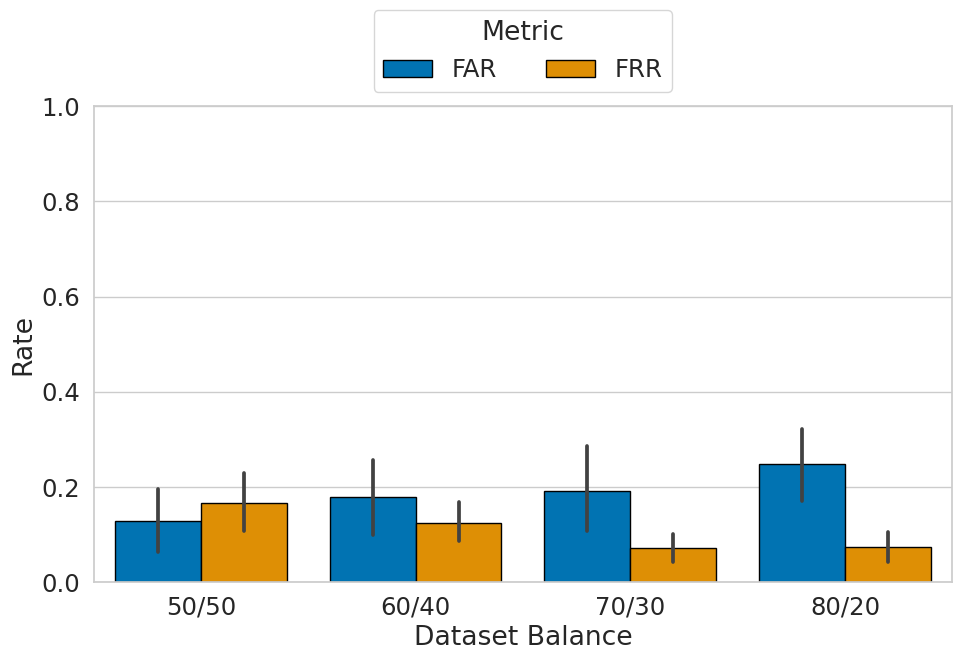

In [9]:
COLORS = ["#1F8A70", "#FC7300"]

sns.set(style="whitegrid", font_scale=1.6,
        palette=sns.color_palette("colorblind", desat=None))

fig, ax = plt.subplots(figsize=(10, 7))
bar_plot = sns.barplot(data=balancedf, x='Balance', y='FAR/FRR_Score', hue='FAR/FRR', saturation=1, ax=ax, edgecolor="black")

# Legend
leg = plt.legend(bbox_to_anchor=(0., 1.02, 1., .102),
                 loc='lower center', ncol=3, borderaxespad=0.2)
leg._legend_box.align = "left"
leg.set_title("Metric")
leg._legend_box.align = "center"

# Axis labels
plt.ylim(0, 1)
plt.xlabel("Dataset Balance")
plt.ylabel("Rate")

plt.tight_layout()
plt.savefig(FIGURES + 'AUTH_BalanceRate.pdf')

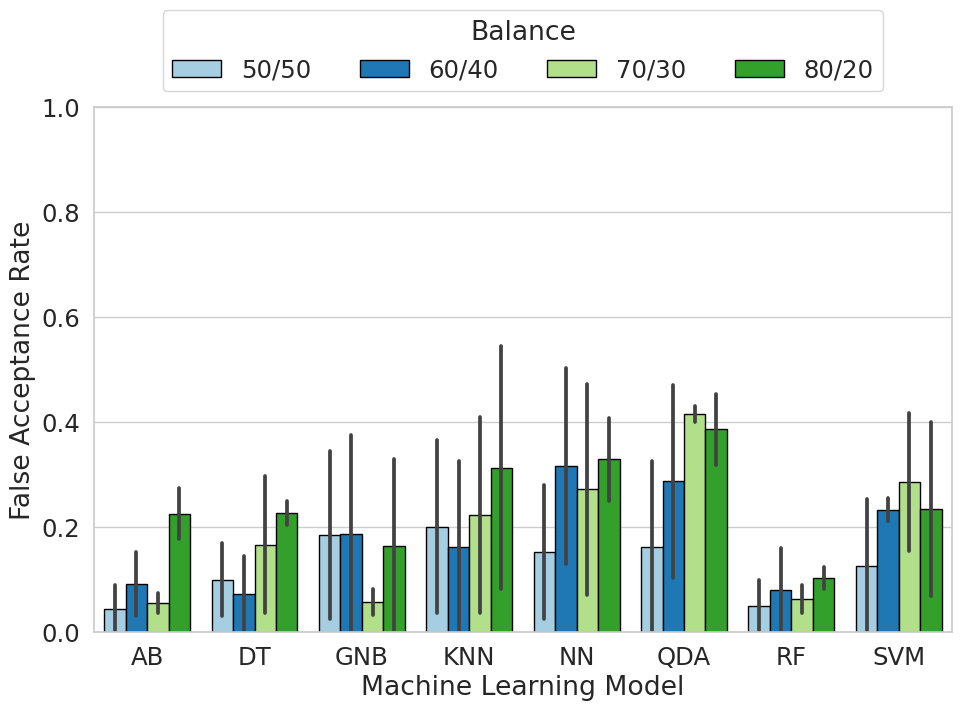

In [10]:
COLORS = ["#1F8A70", "#FC7300"]

sns.set(style="whitegrid", font_scale=1.6,
        palette=sns.color_palette('Paired', desat=None))

df2 = df
df2['FAR+FRR'] = df2['FAR'] + df2['FRR']
fig, ax = plt.subplots(figsize=(10, 7.5))
bar_plot = sns.barplot(data=df2, x='Model', y='FAR', hue='Balance', saturation=1, ax=ax, edgecolor="black")

# Legend
leg = plt.legend(bbox_to_anchor=(0., 1.02, 1., .102),
                 loc='lower center', ncol=4, borderaxespad=0.2)
leg._legend_box.align = "left"
leg.set_title("Balance")
leg._legend_box.align = "center"

# Axis labels
plt.ylim(0, 1)
plt.xlabel("Machine Learning Model")
plt.ylabel("False Acceptance Rate")

plt.tight_layout()
plt.savefig(FIGURES + 'AUTH_BalanceModelFAR.pdf')

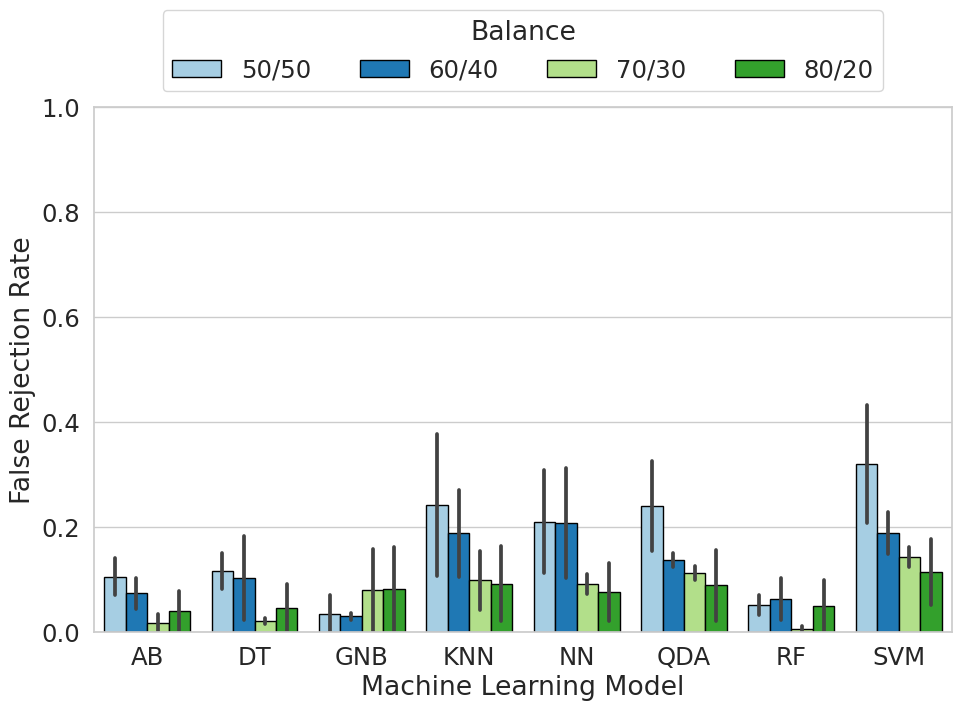

In [11]:
COLORS = ["#1F8A70", "#FC7300"]

sns.set(style="whitegrid", font_scale=1.6,
        palette=sns.color_palette('Paired', desat=None))

df2 = df
df2['FAR+FRR'] = df2['FAR'] + df2['FRR']
fig, ax = plt.subplots(figsize=(10, 7.5))
bar_plot = sns.barplot(data=df2, x='Model', y='FRR', hue='Balance', saturation=1, ax=ax, edgecolor="black")

# Legend
leg = plt.legend(bbox_to_anchor=(0., 1.02, 1., .102),
                 loc='lower center', ncol=4, borderaxespad=0.2)
leg._legend_box.align = "left"
leg.set_title("Balance")
leg._legend_box.align = "center"

# Axis labels
plt.ylim(0, 1)
plt.xlabel("Machine Learning Model")
plt.ylabel("False Rejection Rate")

plt.tight_layout()
plt.savefig(FIGURES + 'AUTH_BalanceModelFRR.pdf')

## 🔎 Identification

### 📏 Mean Performance on All Models

In [12]:
# Loading files
idents = []

for file in sorted(os.listdir(RESULTS)):
    if len(file.split('.')) > 1 and 'IDENT' in file:
        identPath = os.path.join(RESULTS, file)
        idents.append(pd.read_csv(identPath, index_col=0))

df = pd.concat(idents)

In [13]:
# Renaming Models with abbreviations
df['Model'] = df['Model'].str.replace("AdaBoost","AB")
df['Model'] = df['Model'].str.replace("Decision Tree","DT")
df['Model'] = df['Model'].str.replace("Gaussian Naive Bayes","GNB")
df['Model'] = df['Model'].str.replace("Nearest Neighbors","KNN")
df['Model'] = df['Model'].str.replace("Neural Network","NN")
df['Model'] = df['Model'].str.replace("Quadratic Discriminant Analysis","QDA")
df['Model'] = df['Model'].str.replace("Random Forest","RF")
df['Model'] = df['Model'].str.replace("Support Vector Machine","SVM")

# Renaming IDs
df['ID'] = df['ID'].astype('str').str.replace("1","Architecture")
df['ID'] = df['ID'].str.replace("2","Battery Model")

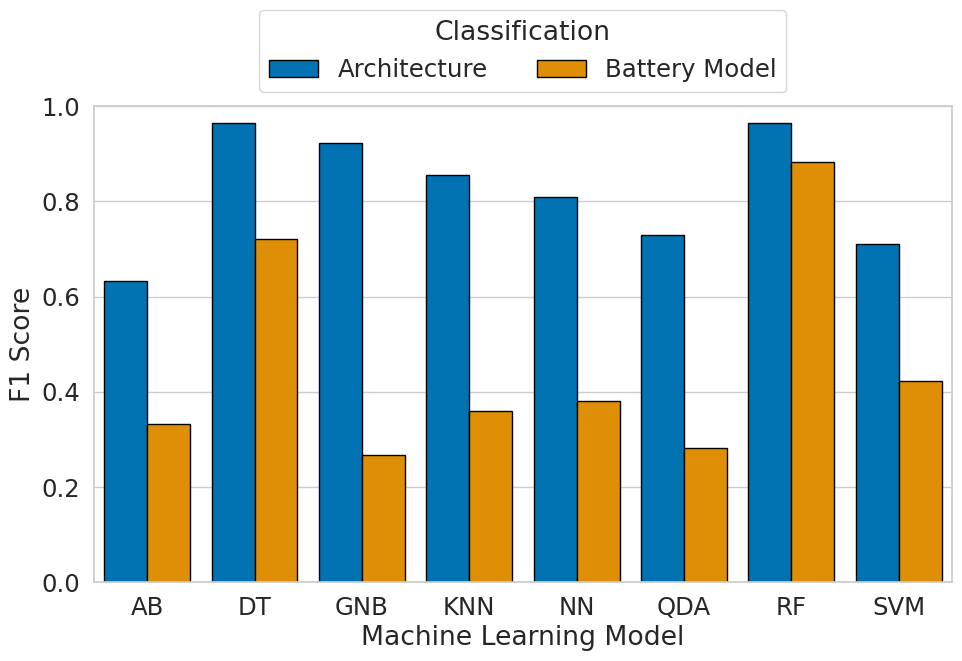

In [14]:
COLORS = ["#1F8A70", "#FC7300"]

sns.set(style="whitegrid", font_scale=1.6,
        palette=sns.color_palette('colorblind', desat=None))

fig, ax = plt.subplots(figsize=(10, 7))
bar_plot = sns.barplot(data=df, x='Model', y='F1', hue='ID',
                       saturation=1, ax=ax, edgecolor="black")

# Legend
leg = plt.legend(bbox_to_anchor=(0., 1.02, 1., .102),
                 loc='lower center', ncol=3, borderaxespad=0.2)
leg._legend_box.align = "left"
leg.set_title("Classification")
leg._legend_box.align = "center"

# Axis labels
plt.ylim(0, 1)
plt.xlabel("Machine Learning Model")
plt.ylabel("F1 Score")

plt.tight_layout()
plt.savefig(FIGURES + 'IDENT_F1.pdf')